# csv 파일 불러오기, DataFrame 생성

파일명: 제품명_modeling.csv 데이터 불러오기
* csv 파일은 작업 상태인 리뷰 중 카테고리가 빈 것은 제거 후 가져온다.

In [1]:
#구글드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [89]:
import pandas as pd
import re # 정규표현식을 사용할 수 있는 내장 모듈

#청소기
# df = pd.read_csv("/content/drive/MyDrive/lg_modeling/cleaner_modeling.csv", sep=",")

#냉장고
#df = pd.read_csv("/content/drive/MyDrive/lg_modeling/refrigerator_modeling.csv", sep=",")

#식세기
df = pd.read_csv("/content/drive/MyDrive/lg_modeling/dishwasher_modeling.csv", sep=",")

# 리뷰 전처리

### 리뷰 개수 확인

In [90]:
print(df.shape)
df.head()

(4127, 3)


,리뷰 번호,리뷰 원문,카테고리
0,24635,하얀물방울 많이 생기네요 식기세척기 하고 나서 건조안시키고 물로 한번 헹궈내고 자...,위생
1,24636,테트리스도 잘 쌓아야 하고 흥건하지 않고 물기 살짝 맺힐 정도 그릇재질에 따라 다르...,위생
2,24640,다끝나면 열리던데요종료응 1분전에전 종료음 시끄러워서 읍앴다는,사운드
3,24641,물 젖어서 나와요 전 고온건조 돌리는 전기세도 아깝고 어차피 다 돌리고나서는 완전 ...,위생
4,24642,저희도 안그런데 문열리고 끝난소리나요,사운드


### Dataframe(df) 열 이름 변경

In [91]:
df.columns = ['Review_Num', 'Original_Comment', 'Category']
df

,Review_Num,Original_Comment,Category
0,24635,하얀물방울 많이 생기네요 식기세척기 하고 나서 건조안시키고 물로 한번 헹궈내고 자...,위생
1,24636,테트리스도 잘 쌓아야 하고 흥건하지 않고 물기 살짝 맺힐 정도 그릇재질에 따라 다르...,위생
2,24640,다끝나면 열리던데요종료응 1분전에전 종료음 시끄러워서 읍앴다는,사운드
3,24641,물 젖어서 나와요 전 고온건조 돌리는 전기세도 아깝고 어차피 다 돌리고나서는 완전 ...,위생
4,24642,저희도 안그런데 문열리고 끝난소리나요,사운드
...,...,...,...
4122,66324,사용하던 LG세척기가 고장나서 새로샀어요 원래 있던자리에 넣는거라 쉽게 설치완료일단...,소음
4123,66352,저는 엘지 같은모델 쓰는데 비추입니다 세제도 잘 안녹고 기능설정도 디테일하지 않고 ...,위생
4124,66357,그전에 타회사 자동열림 식기세척기를 사용하다 잦은 고장때문에 이제품을 구입했어요타사...,소음
4125,66363,설거지끝나면 열림자동문아닌것빼곤진짜뽀드득 잘 닦이고 전좋아요소음도 없구요전자는 l...,소음


### 불필요한 문자열 제거 (리뷰 원문 전처리)

In [92]:
# html태그 제거
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'<[^>]*>', repl=r'', regex=True)

# email 주소 제거
df['Original_Comment']=df['Original_Comment'].str.replace(pat=r'(\[a-zA-Z0-9\_.+-\]+@\[a-zA-Z0-9-\]+.\[a-zA-Z0-9-.\]+)', 
                                             repl=r'', regex=True)

# _제거
df['Original_Comment']=df['Original_Comment'].str.replace('_', '')

# \r, \n 제거
df['Original_Comment']=df['Original_Comment'].str.replace(pat=r'[\r|\n]', repl=r'', regex=True)

# url 제거
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*',repl=r'', regex=True)

# 자음, 모음 제거
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'([ㄱ-ㅎㅏ-ㅣ]+)', repl=r'', regex=True)

# 특수 기호 제거
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'[^\w\s]', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace('1n', '')
df['Original_Comment'] = df['Original_Comment'].str.replace('_', '')

# 모두 영어인 행 공백으로 대체
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'^[a-zA-Z\s]+$', repl=r'', regex=True)

# 모두 숫자인 행 공백으로 대체
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'^[0-9\s]+$', repl=r'', regex=True)

# 좌우 공백 제거
df['Original_Comment']= df['Original_Comment'].str.strip()

# 아이디 관련 단어 제거
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'ID\s[a-zA-Z0-9]+', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'아이디\s[a-zA-Z0-9]+', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'id\s[a-zA-Z0-9]+', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'ID[a-zA-Z0-9]+', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'아이디[a-zA-Z0-9]+', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'id[a-zA-Z0-9]+', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'ID\s', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'아이디\s', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'id\s', repl=r'', regex=True)

# 주문번호 관련 단어 제거
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'주문번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'결제번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'구매번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'주문\s번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'결제\s번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'구매\s번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'주문번호\s', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'결제번호\s', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'구매번호\s', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'주문\s번호\s', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'결제\s번호\s', repl=r'', regex=True)
df['Original_Comment'] = df['Original_Comment'].str.replace(pat=r'구매\s번호\s', repl=r'', regex=True)

In [93]:
df.head(10)

,Review_Num,Original_Comment,Category
0,24635,하얀물방울 많이 생기네요 식기세척기 하고 나서 건조안시키고 물로 한번 헹궈내고 자...,위생
1,24636,테트리스도 잘 쌓아야 하고 흥건하지 않고 물기 살짝 맺힐 정도 그릇재질에 따라 다르...,위생
2,24640,다끝나면 열리던데요종료응 1분전에전 종료음 시끄러워서 읍앴다는,사운드
3,24641,물 젖어서 나와요 전 고온건조 돌리는 전기세도 아깝고 어차피 다 돌리고나서는 완전 ...,위생
4,24642,저희도 안그런데 문열리고 끝난소리나요,사운드
5,24661,요즘 식세기들 점점 비싸지는데 왜 그런걸까여23시간 돌리는데 제대로 안마르고요그릇 ...,위생
6,24662,열리고 뜨거운 김 빠지고 난 뒤에 종료음 들려요 십몇분까진 아닌것 같은데 지켜본적이...,사운드
7,24691,문 열리고 12분 정도 뒤에 종료음 들려요 몇십분은 아니던뎅,사운드
8,24762,사고나서 매일 한번씩 돌려봤습니다 3인 가정인데 설거지 안 하니까 저녁이 너무 평화...,위생
9,24770,좋아요 이뻐요 잘세척되요,디자인


### Category 리스트로 변경

In [94]:
df.insert(3, 'Split_Category', df.Category.str.split('and')) # Category에서 and 제거 후 리스트화
df

,Review_Num,Original_Comment,Category,Split_Category
0,24635,하얀물방울 많이 생기네요 식기세척기 하고 나서 건조안시키고 물로 한번 헹궈내고 자...,위생,[위생]
1,24636,테트리스도 잘 쌓아야 하고 흥건하지 않고 물기 살짝 맺힐 정도 그릇재질에 따라 다르...,위생,[위생]
2,24640,다끝나면 열리던데요종료응 1분전에전 종료음 시끄러워서 읍앴다는,사운드,[사운드]
3,24641,물 젖어서 나와요 전 고온건조 돌리는 전기세도 아깝고 어차피 다 돌리고나서는 완전 ...,위생,[위생]
4,24642,저희도 안그런데 문열리고 끝난소리나요,사운드,[사운드]
...,...,...,...,...
4122,66324,사용하던 LG세척기가 고장나서 새로샀어요 원래 있던자리에 넣는거라 쉽게 설치완료일단...,소음,[소음]
4123,66352,저는 엘지 같은모델 쓰는데 비추입니다 세제도 잘 안녹고 기능설정도 디테일하지 않고 ...,위생,[위생]
4124,66357,그전에 타회사 자동열림 식기세척기를 사용하다 잦은 고장때문에 이제품을 구입했어요타사...,소음,[소음]
4125,66363,설거지끝나면 열림자동문아닌것빼곤진짜뽀드득 잘 닦이고 전좋아요소음도 없구요전자는 l...,소음,[소음]


### Split_Category 각 리스트에서 중복으로 들어가는 카테고리 제거

In [95]:
df_leng=len(df)
df_leng

4127

In [96]:
for i in range(df_leng):
    if len(df.Split_Category[i]) > 1:
            sample1 = df.Split_Category[i]
            sample2 = set(sample1)
            df.Split_Category[i] = list(sample2)
            print(df.Split_Category[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


['위생']
['소음', '위생']
['디자인', '소음']
['디자인', '소음']
['시인성가독성', '디자인', '소음']
['시인성가독성', '소음']
['동작편리성', '소음']
['디자인', '위생']
['디자인']
['기타']
['디자인']
['소음']
['사운드', '동작편리성']
['디자인']
['디자인']
['디자인']
['소음']
['디자인']
['디자인']
['디자인', '소음']
['디자인', '소음']
['소음']
['디자인']
['디자인']
['위생']
['기타', '위생']
['위생']
['디자인', '소음']
['기타', '디자인']
['공간효율성', '디자인']
['디자인', '위생']
['동작편리성', '디자인']
['위생']
['디자인']
['사운드', '동작편리성', '디자인', '소음']
['소음']
['디자인']
['디자인']
['디자인', '소음']
['조립성', '디자인']
['디자인']
['디자인']
['위생']
['동작편리성', '소음']
['위생']
['디자인']
['소음']
['소음']
['디자인']
['디자인']
['소음', '위생']
['디자인']
['정보성', '디자인', '유지관리']
['디자인']
['위생']
['위생']
['기타', '위생']
['디자인', '소음']
['디자인', '위생']
['위생']
['위생']
['동작편리성', '소음']
['위생']
['디자인', '위생']
['공간효율성', '위생']
['디자인']
['위생']
['디자인', '소음']
['위생']
['디자인', '소음']
['디자인', '소음']
['디자인']
['위생']
['디자인']
['위생']
['위생']
['디자인', '유지관리']
['위생']
['위생']
['유지관리']
['디자인']
['디자인']
['디자인', '위생']
['디자인']
['디자인']
['위생', '조작편리성']
['위생']
['위생']
['디자인']
['소음', '위생']
['정보성', '위생']
['디자인', '소음']
['디자인']
['위생'

In [97]:
df

,Review_Num,Original_Comment,Category,Split_Category
0,24635,하얀물방울 많이 생기네요 식기세척기 하고 나서 건조안시키고 물로 한번 헹궈내고 자...,위생,[위생]
1,24636,테트리스도 잘 쌓아야 하고 흥건하지 않고 물기 살짝 맺힐 정도 그릇재질에 따라 다르...,위생,[위생]
2,24640,다끝나면 열리던데요종료응 1분전에전 종료음 시끄러워서 읍앴다는,사운드,[사운드]
3,24641,물 젖어서 나와요 전 고온건조 돌리는 전기세도 아깝고 어차피 다 돌리고나서는 완전 ...,위생,[위생]
4,24642,저희도 안그런데 문열리고 끝난소리나요,사운드,[사운드]
...,...,...,...,...
4122,66324,사용하던 LG세척기가 고장나서 새로샀어요 원래 있던자리에 넣는거라 쉽게 설치완료일단...,소음,[소음]
4123,66352,저는 엘지 같은모델 쓰는데 비추입니다 세제도 잘 안녹고 기능설정도 디테일하지 않고 ...,위생,[위생]
4124,66357,그전에 타회사 자동열림 식기세척기를 사용하다 잦은 고장때문에 이제품을 구입했어요타사...,소음,[소음]
4125,66363,설거지끝나면 열림자동문아닌것빼곤진짜뽀드득 잘 닦이고 전좋아요소음도 없구요전자는 l...,소음,[소음]


# 새로운 DataFrame 생성 (해당하는 제품군에 맞게 선택)- 해당하는 제품군만 실행

In [98]:
new_df = pd.DataFrame({"original_comment": df['Original_Comment'], "category":df['Split_Category']})

In [56]:
# #청소기에 해당하는 카테고리를 열에 추가
# new_df['소음']=0
# new_df['사운드']=0
# new_df['위생']=0
# new_df['디자인']=0
# new_df['그립감']=0
# new_df['청소가능영역']=0
# new_df['무게']=0
# new_df['촉감']=0
# new_df['핸들링']=0
# new_df['동작편리성']=0
# new_df['조작편리성']=0
# new_df['조립성']=0
# new_df['유지관리']=0
# new_df['정보성']=0
# new_df['흡입력']=0
# new_df['배터리']=0
# new_df['견고성']=0
# new_df['안전성']=0
# new_df['시인성가독성']=0
# new_df['기타']=0

In [12]:
# #냉장고에 해당하는 카테고리를 열에 추가
# new_df['소음']=0
# new_df['사운드']=0
# new_df['위생']=0
# new_df['디자인']=0
# new_df['조명']=0
# new_df['촉감']=0
# new_df['동작편리성']=0
# new_df['조작편리성']=0
# new_df['공간효율성']=0
# new_df['조립성']=0
# new_df['유지관리']=0
# new_df['정보성']=0
# new_df['견고성']=0
# new_df['안전성']=0
# new_df['시인성가독성']=0
# new_df['기타']=0

In [99]:
#식세기에 해당하는 카테고리를 열에 추가
new_df['소음']=0
new_df['사운드']=0
new_df['위생']=0
new_df['디자인']=0
new_df['촉감']=0
new_df['동작편리성']=0
new_df['조작편리성']=0
new_df['공간효율성']=0
new_df['조립성']=0
new_df['유지관리']=0
new_df['정보성']=0
new_df['견고성']=0
new_df['안전성']=0
new_df['시인성가독성']=0
new_df['기타']=0

In [100]:
new_df

,original_comment,category,소음,사운드,위생,디자인,촉감,동작편리성,조작편리성,공간효율성,조립성,유지관리,정보성,견고성,안전성,시인성가독성,기타
0,하얀물방울 많이 생기네요 식기세척기 하고 나서 건조안시키고 물로 한번 헹궈내고 자...,[위생],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,테트리스도 잘 쌓아야 하고 흥건하지 않고 물기 살짝 맺힐 정도 그릇재질에 따라 다르...,[위생],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,다끝나면 열리던데요종료응 1분전에전 종료음 시끄러워서 읍앴다는,[사운드],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,물 젖어서 나와요 전 고온건조 돌리는 전기세도 아깝고 어차피 다 돌리고나서는 완전 ...,[위생],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,저희도 안그런데 문열리고 끝난소리나요,[사운드],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122,사용하던 LG세척기가 고장나서 새로샀어요 원래 있던자리에 넣는거라 쉽게 설치완료일단...,[소음],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4123,저는 엘지 같은모델 쓰는데 비추입니다 세제도 잘 안녹고 기능설정도 디테일하지 않고 ...,[위생],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4124,그전에 타회사 자동열림 식기세척기를 사용하다 잦은 고장때문에 이제품을 구입했어요타사...,[소음],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4125,설거지끝나면 열림자동문아닌것빼곤진짜뽀드득 잘 닦이고 전좋아요소음도 없구요전자는 l...,[소음],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 각 리뷰에 해당하는 카테고리의 값을 1로 변경
### ex) [디자인, 동작편리성] -> 디자인 1, 동작편리성 1, 그 외 0

In [101]:
length=len(new_df)

for i in range(length):
    new_df.category[i]
    for l in new_df.category[i]:
        new_df[l][i] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [102]:
new_df

,original_comment,category,소음,사운드,위생,디자인,촉감,동작편리성,조작편리성,공간효율성,조립성,유지관리,정보성,견고성,안전성,시인성가독성,기타
0,하얀물방울 많이 생기네요 식기세척기 하고 나서 건조안시키고 물로 한번 헹궈내고 자...,[위생],0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,테트리스도 잘 쌓아야 하고 흥건하지 않고 물기 살짝 맺힐 정도 그릇재질에 따라 다르...,[위생],0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,다끝나면 열리던데요종료응 1분전에전 종료음 시끄러워서 읍앴다는,[사운드],0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,물 젖어서 나와요 전 고온건조 돌리는 전기세도 아깝고 어차피 다 돌리고나서는 완전 ...,[위생],0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,저희도 안그런데 문열리고 끝난소리나요,[사운드],0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122,사용하던 LG세척기가 고장나서 새로샀어요 원래 있던자리에 넣는거라 쉽게 설치완료일단...,[소음],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4123,저는 엘지 같은모델 쓰는데 비추입니다 세제도 잘 안녹고 기능설정도 디테일하지 않고 ...,[위생],0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4124,그전에 타회사 자동열림 식기세척기를 사용하다 잦은 고장때문에 이제품을 구입했어요타사...,[소음],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4125,설거지끝나면 열림자동문아닌것빼곤진짜뽀드득 잘 닦이고 전좋아요소음도 없구요전자는 l...,[소음],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [103]:
new_df.drop_duplicates(subset = ['original_comment'], inplace=True) #중복된 행 제거
new_df

,original_comment,category,소음,사운드,위생,디자인,촉감,동작편리성,조작편리성,공간효율성,조립성,유지관리,정보성,견고성,안전성,시인성가독성,기타
0,하얀물방울 많이 생기네요 식기세척기 하고 나서 건조안시키고 물로 한번 헹궈내고 자...,[위생],0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,테트리스도 잘 쌓아야 하고 흥건하지 않고 물기 살짝 맺힐 정도 그릇재질에 따라 다르...,[위생],0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,다끝나면 열리던데요종료응 1분전에전 종료음 시끄러워서 읍앴다는,[사운드],0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,물 젖어서 나와요 전 고온건조 돌리는 전기세도 아깝고 어차피 다 돌리고나서는 완전 ...,[위생],0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,저희도 안그런데 문열리고 끝난소리나요,[사운드],0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122,사용하던 LG세척기가 고장나서 새로샀어요 원래 있던자리에 넣는거라 쉽게 설치완료일단...,[소음],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4123,저는 엘지 같은모델 쓰는데 비추입니다 세제도 잘 안녹고 기능설정도 디테일하지 않고 ...,[위생],0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4124,그전에 타회사 자동열림 식기세척기를 사용하다 잦은 고장때문에 이제품을 구입했어요타사...,[소음],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4125,설거지끝나면 열림자동문아닌것빼곤진짜뽀드득 잘 닦이고 전좋아요소음도 없구요전자는 l...,[소음],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [104]:
new_df = new_df.drop(columns=['category'])
new_df

,original_comment,소음,사운드,위생,디자인,촉감,동작편리성,조작편리성,공간효율성,조립성,유지관리,정보성,견고성,안전성,시인성가독성,기타
0,하얀물방울 많이 생기네요 식기세척기 하고 나서 건조안시키고 물로 한번 헹궈내고 자...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,테트리스도 잘 쌓아야 하고 흥건하지 않고 물기 살짝 맺힐 정도 그릇재질에 따라 다르...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,다끝나면 열리던데요종료응 1분전에전 종료음 시끄러워서 읍앴다는,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,물 젖어서 나와요 전 고온건조 돌리는 전기세도 아깝고 어차피 다 돌리고나서는 완전 ...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,저희도 안그런데 문열리고 끝난소리나요,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122,사용하던 LG세척기가 고장나서 새로샀어요 원래 있던자리에 넣는거라 쉽게 설치완료일단...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4123,저는 엘지 같은모델 쓰는데 비추입니다 세제도 잘 안녹고 기능설정도 디테일하지 않고 ...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4124,그전에 타회사 자동열림 식기세척기를 사용하다 잦은 고장때문에 이제품을 구입했어요타사...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4125,설거지끝나면 열림자동문아닌것빼곤진짜뽀드득 잘 닦이고 전좋아요소음도 없구요전자는 l...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 효율적인 코드 실행을 위해 한글로 되있는 열 이름을 영어로 변경

In [105]:
new_df.rename(columns={'소음':'noise'}, inplace=True)
new_df.rename(columns={'사운드':'sound'}, inplace=True)
new_df.rename(columns={'위생':'hygienic'}, inplace=True)
new_df.rename(columns={'디자인':'design'}, inplace=True)
new_df.rename(columns={'촉감':'touch'}, inplace=True)
new_df.rename(columns={'동작편리성':'movement'}, inplace=True)
new_df.rename(columns={'조작편리성':'operation'}, inplace=True)
new_df.rename(columns={'공간효율성':'spaceefficiency'}, inplace=True)
new_df.rename(columns={'조립성':'ssembly'}, inplace=True)
new_df.rename(columns={'유지관리':'maintenance'}, inplace=True)
new_df.rename(columns={'정보성':'information'}, inplace=True)
new_df.rename(columns={'견고성':'solidity'}, inplace=True)
new_df.rename(columns={'안전성':'safety'}, inplace=True)
new_df.rename(columns={'시인성가독성':'visibility'}, inplace=True)
new_df.rename(columns={'기타':'etc'}, inplace=True)

new_df

,original_comment,noise,sound,hygienic,design,touch,movement,operation,spaceefficiency,ssembly,maintenance,information,solidity,safety,visibility,etc
0,하얀물방울 많이 생기네요 식기세척기 하고 나서 건조안시키고 물로 한번 헹궈내고 자...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,테트리스도 잘 쌓아야 하고 흥건하지 않고 물기 살짝 맺힐 정도 그릇재질에 따라 다르...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,다끝나면 열리던데요종료응 1분전에전 종료음 시끄러워서 읍앴다는,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,물 젖어서 나와요 전 고온건조 돌리는 전기세도 아깝고 어차피 다 돌리고나서는 완전 ...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,저희도 안그런데 문열리고 끝난소리나요,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122,사용하던 LG세척기가 고장나서 새로샀어요 원래 있던자리에 넣는거라 쉽게 설치완료일단...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4123,저는 엘지 같은모델 쓰는데 비추입니다 세제도 잘 안녹고 기능설정도 디테일하지 않고 ...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4124,그전에 타회사 자동열림 식기세척기를 사용하다 잦은 고장때문에 이제품을 구입했어요타사...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4125,설거지끝나면 열림자동문아닌것빼곤진짜뽀드득 잘 닦이고 전좋아요소음도 없구요전자는 l...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# [NLP] 코랩에 konlpy 설치 후 okt 사용해보기 (이 코드에서는 사용 x -> 혹시 나중에 사용할 수도 있기 때문에 설치방법만 보기)

In [ ]:
# # bash 셸로 명령어 입력하여 라이브러리 설치하기

# %%bash
# apt-get update
# apt-get install g++ openjdk-8-jdk python-dev python3-dev
# pip3 install JPype1
# pip3 install konlpy

In [ ]:
# # JAVA_HOME 환경변수 설정하기

# %env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
# # 형태소
# print("okt.morphs : ", okt.morphs('흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다'))

# # 명사
# print("okt.nouns : ", okt.nouns('흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다'))

# # 형태소 + 품사
# print("okt.pos : ", okt.pos('흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다'))

# 토큰화 패키지 customized KoNLPy 사용
# 설명 https://wikidocs.net/44249 참고

In [19]:
!pip install customized_konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 881 kB 4.9 MB/s 
     |████████████████████████████████| 19.4 MB 7.5 MB/s 
     |████████████████████████████████| 453 kB 40.9 MB/s 


### 잘못 토큰화될 가능성이 높은 일부 단어들을, customized KoNLPy를 통해 토큰으로 직접 지정

In [106]:
from ckonlpy.tag import Twitter

twi = Twitter()

words = [('디자인','Noun')]

for word in words:
    name, poomsa = word
    twi.add_dictionary(name, poomsa)

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


### 형태소 분석기를 사용하여 토큰화를 하면서 불용어를 제거하여 text_token에 저장

In [107]:
stopwords = ['의', '가', '이', '은', '들', '는', '과', '도', '를', '으로', '에',
             '하다', '을', '이다', '것', '로', '에서', '그', '인', '서', '네요',
             '임', '랑', '게', '요', '에게', '엔']

text_token = []
for sentence in new_df['original_comment']:
    tmp = []
    tmp = twi.morphs(sentence, stem=True, norm=True)  #토큰화
    tmp = [word for word in tmp if not word in stopwords]  #불용어 제거
    text_token.append(tmp)

In [108]:
print(text_token[:3])

[['하얗다', '물방울', '많이', '생기', '네', '식기세척기', '하고', '나서다', '건조', '안시', '키', '고', '물', '한번', '헹궈내', '고', '자연', '건조', '덜', '그렇다', '에요'], ['테트리스', '자다', '쌓다', '아야', '하고', '흥건', '하', '지', '않다', '물기', '살짝', '맺다', '힐', '정도', '그릇', '재질', '따르다', '다르다', '기도', '한데', '유리', '도자기', '류', '다', '자다', '말', '라서', '나오다', '편이', '에요', '엘지', '빌트', '쓰다', '있다', '린스', '포함', '되다', '달리', '올인원', '세제', '넣다', '1', '시간', '반', '작동', '해', '작동', '후', '에는', '바로', '안', '꺼내다', '한참', '후', '정리'], ['다', '끝나다', '열리다', '던데', '종료', '응', '1', '분전', '에전', '종료', '음', '시끄럽다', '읍앴다']]


### 정수 인코딩 - 기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터에 정수 인코딩을 수행. 우선, 훈련 데이터에 대해서 단어 집합(vocaburary)을 만들기

In [109]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_token)

### 아래 결과를 보면단어가 9900개가 넘게 존재. 각 정수는 전체 훈련 데이터에서 등장 빈도수가 높은 순서대로 부여되었기 때문에, 높은 정수가 부여된 단어들은 등장 빈도수가 매우 낮다는 것을 의미.

In [110]:
print(tokenizer.word_index)

{'어요': 1, '좋다': 2, '있다': 3, '보다': 4, '설치': 5, '되다': 6, '하고': 7, '같다': 8, '자다': 9, '고': 10, '너무': 11, '없다': 12, '저': 13, '사용': 14, '세척': 15, '들다': 16, '다': 17, '해': 18, '안': 19, '쓰다': 20, '식': 21, '세기': 22, '식기세척기': 23, '소음': 24, '넣다': 25, '세제': 26, '님': 27, '한': 28, '않다': 29, '어서': 30, '해서': 31, '설거지': 32, '기사': 33, '디자인': 34, '더': 35, '그릇': 36, '시간': 37, '만족': 38, '돌리다': 39, '엘지': 40, '물': 41, '이쁘다': 42, '문': 43, '때': 44, '지만': 45, '끄다': 46, '받다': 47, '예쁘다': 48, '생각': 49, '만': 50, '제품': 51, '넘다': 52, '많이': 53, '크다': 54, '건조': 55, '써다': 56, '냄새': 57, '배송': 58, '전': 59, '나': 60, '니': 61, '거': 62, '해주': 63, '잘': 64, '좀': 65, '소리': 66, '정말': 67, '기능': 68, '정도': 69, '제': 70, '구매': 71, '오다': 72, '후': 73, '까지': 74, '린스': 75, 'lg': 76, '네': 77, '색상': 78, '하': 79, '이라': 80, '면': 81, '사다': 82, '싱크대': 83, '친절': 84, '히': 85, '라': 86, '열': 87, '나다': 88, '깔다': 89, '고민': 90, '그렇다': 91, '되어다': 92, '자동': 93, '싶다': 94, '인용': 95, '화이트': 96, '가다': 97, '주문': 98, '얼룩': 99, '깨끗하다': 100, '데': 101, '깔끔하다': 10

### 빈도수가 낮은 단어들은 자연어 처리에서 배제. 등장 빈도수가 2회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인

### 아래 코드 결과: 등장 빈도가 threshold 값인 2회 미만. 즉, 1회 이하인 단어들은 단어 집합에서 무려 절반 이상을 차지. 하지만, 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 매우 적은 수치인 1.30%밖에 되지 않습니다. 아무래도 등장 빈도가 1회 이하인 단어들은 자연어 처리에서 별로 중요하지 않을 듯 함. 그래서 이 단어들은 정수 인코딩 과정에서 배제시킴

In [111]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 7784
등장 빈도가 1번 이하인 희귀 단어의 수: 3302
단어 집합에서 희귀 단어의 비율: 42.42034943473792
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.423343950446946


### 등장 빈도수가 1이하인 단어들의 수를 제외한 단어의 개수를 단어 집합의 최대 크기로 제한

In [112]:
# 전체 단어 개수 중 빈도수 1이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 4483


### 케라스 토크나이저의 인자로 넘겨주고 텍스트 시퀀스를 정수 시퀀스로 변환

In [113]:
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(text_token)

X = tokenizer.texts_to_sequences(text_token)
print('리뷰의 최대 길이 :',max(len(l) for l in X))
print('리뷰의 평균 길이 :',sum(map(len, X))/len(X))

리뷰의 최대 길이 : 385
리뷰의 평균 길이 : 32.216137630239885


In [114]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

max_len = 120
below_threshold_len(max_len, X)
#문장 길이가 120로 할 경우, 약 97%의 대부분의 샘플을 커버 가능

전체 샘플 중 길이가 120 이하인 샘플의 비율: 96.9227041434456


### 각 리뷰 샘플들에 대해 패딩을 진행

In [115]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = pad_sequences(X, maxlen = max_len)
X

array([[   0,    0,    0, ...,  430,   91,  237],
       [   0,    0,    0, ..., 1135,   73,  493],
       [   0,    0,    0, ...,  856,  387,  617],
       ...,
       [   0,    0,    0, ...,   56,    4,    2],
       [   0,    0,    0, ...,   56,    4,  152],
       [   0,    0,    0, ...,   34,  759,  170]], dtype=int32)

### 16개 카테고리이기 때문에 y에는 16개의 label이 들어가도록 설정

In [117]:
import numpy as np
y = np.array(new_df.iloc[:, 1:16])
y

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### 모델링을 위해 train, test set 분리

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train = np.array(X_train)
X_test = np.array(X_test)

print(len(X_train))
print(len(X_test))

3301
826


# 모델링 - GRU를 이용한 Multi-label 아키텍처를 이용하여 모델링을 진행

In [119]:
import tensorflow.keras.backend as K

def F1score(y_true, y_pred):
    eps = K.epsilon()
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    real_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    pred_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    recall = true_positives / (real_positives + eps)
    precision = true_positives / (pred_positives + eps)
    f1_score = 2 * (recall * precision) / (recall + precision + eps)
    return f1_score

In [121]:
label_names = new_df.columns[1:16] #label 종류
n_label = len(label_names)

y_train_list = {label_names[i]:y_train[:,i] for i in range(n_label)}
y_test_list = {label_names[i]:y_test[:,i] for i in range(n_label)}

y_train_list

{'noise': array([1, 0, 1, ..., 1, 1, 0]),
 'sound': array([0, 0, 0, ..., 0, 0, 0]),
 'hygienic': array([0, 0, 0, ..., 0, 0, 0]),
 'design': array([0, 1, 0, ..., 0, 0, 1]),
 'touch': array([0, 0, 0, ..., 0, 0, 0]),
 'movement': array([0, 0, 0, ..., 0, 0, 0]),
 'operation': array([0, 0, 0, ..., 0, 0, 0]),
 'spaceefficiency': array([0, 0, 0, ..., 0, 0, 0]),
 'ssembly': array([0, 0, 0, ..., 0, 0, 0]),
 'maintenance': array([0, 0, 0, ..., 0, 0, 0]),
 'information': array([0, 0, 0, ..., 0, 0, 0]),
 'solidity': array([0, 0, 0, ..., 0, 0, 0]),
 'safety': array([0, 0, 0, ..., 1, 0, 0]),
 'visibility': array([0, 0, 0, ..., 0, 0, 0]),
 'etc': array([0, 0, 0, ..., 0, 0, 0])}

In [122]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Embedding, Dense, GRU, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [123]:
def SimpleGRU():
    input_layer = Input(shape=(max_len,))
    embedding_text = Embedding(vocab_size, 256)(input_layer)
    x = GRU(128)(embedding_text)
    x = Dropout(0.5)(x)
    output_layers = [Dense(1, activation="sigmoid", name=label_names[i])(x) for i in range(y.shape[1])]

    model = Model(inputs=input_layer, outputs=output_layers)
    model.compile(loss=['binary_crossentropy']*n_label, optimizer='rmsprop', metrics=[F1score])

    return model


model = SimpleGRU()

In [124]:
callback_list = [EarlyStopping(monitor='val_loss', patience=4),
                ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
history = model.fit(X_train, y_train_list, epochs=20, batch_size=60, validation_split=0.1, callbacks=callback_list)

Epoch 1/20
50/50 [==============================] - 35s 462ms/step - loss: 3.9125 - noise_loss: 0.6216 - sound_loss: 0.1327 - hygienic_loss: 0.6231 - design_loss: 0.7521 - touch_loss: 0.0849 - movement_loss: 0.2582 - operation_loss: 0.1500 - spaceefficiency_loss: 0.2629 - ssembly_loss: 0.0925 - maintenance_loss: 0.1606 - information_loss: 0.1628 - solidity_loss: 0.1509 - safety_loss: 0.0933 - visibility_loss: 0.1384 - etc_loss: 0.2285 - noise_F1score: 0.1253 - sound_F1score: 0.0011 - hygienic_F1score: 0.1214 - design_F1score: 0.3194 - touch_F1score: 0.0000e+00 - movement_F1score: 0.0062 - operation_F1score: 0.0000e+00 - spaceefficiency_F1score: 0.0012 - ssembly_F1score: 0.0000e+00 - maintenance_F1score: 0.0049 - information_F1score: 0.0000e+00 - solidity_F1score: 0.0057 - safety_F1score: 0.0013 - visibility_F1score: 0.0000e+00 - etc_F1score: 0.0112 - val_loss: 2.7417 - val_noise_loss: 0.5231 - val_sound_loss: 0.0642 - val_hygienic_loss: 0.4988 - val_design_loss: 0.6383 - val_touch_loss

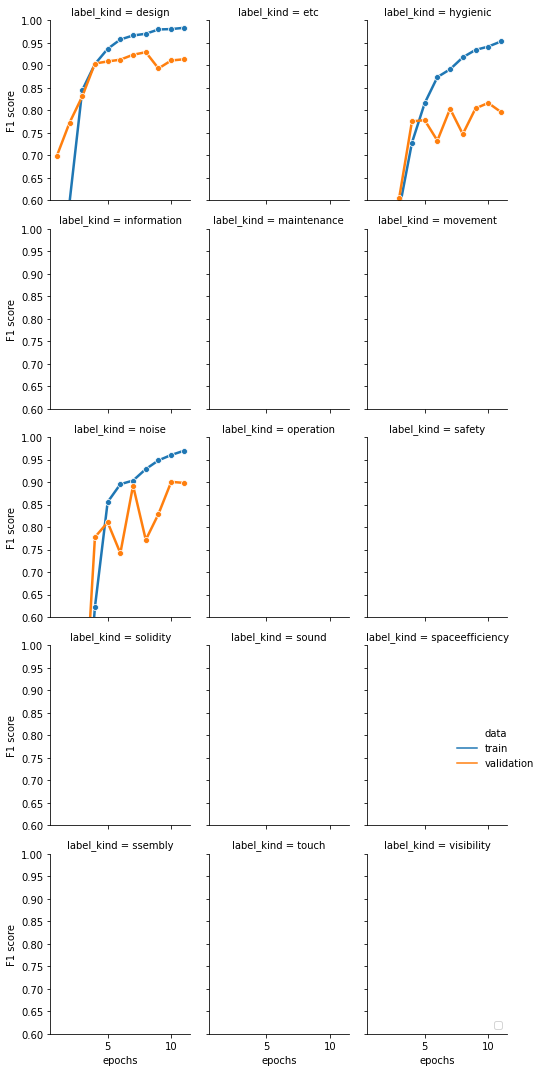

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors

def history_to_value(history, n_label):
    history_out = pd.DataFrame(history.history)
    epochs = history_out.shape[0]
    history_out = history_out.drop('loss', axis=1).stack().reset_index()
    history_out['F1score'] = history_out['level_1'].apply(lambda x: 1 if x.split('_')[-1] =='F1score' else 0)
    history_out['label_kind'] = history_out['level_1'].apply(lambda x: x.split('_')[-2])
    history_out['data'] = history_out['level_1'].apply(lambda x: 'validation' if len(x.split('_')) == 3 else 'train')
    history_out = history_out[history_out['F1score'] == 1][[0, 'label_kind', 'data']].rename(columns={0:'values'}).reset_index(drop=True)
    history_out.sort_values(by=['label_kind', 'data'], inplace=True)
    history_out['epochs'] = list(range(1,epochs+1)) * n_label * 2
    return history_out

def plotDF(history, n_label):
    history_out = history_to_value(history, n_label)
    fig = sns.relplot(data=history_out, x="epochs", y="values", hue="data", col="label_kind", linewidth=2.5, kind='line', col_wrap=3,
                      marker='o', height=3, aspect=0.8)
    plt.legend(loc='lower right')
    leg = fig._legend
    leg.set_bbox_to_anchor([0.9,0.3])
    fig.set(ylim=(0.6, 1), ylabel='F1 score')

plotDF(history, n_label)

In [126]:
best_model = load_model('best_model.h5', custom_objects = {'F1score':F1score})
best_model.evaluate(X_test, y_test_list, batch_size=60)

14/14 [==============================] - 4s 95ms/step - loss: 1.5318 - noise_loss: 0.1699 - sound_loss: 0.0403 - hygienic_loss: 0.2299 - design_loss: 0.1984 - touch_loss: 0.0120 - movement_loss: 0.1346 - operation_loss: 0.0619 - spaceefficiency_loss: 0.1677 - ssembly_loss: 0.0342 - maintenance_loss: 0.0865 - information_loss: 0.0702 - solidity_loss: 0.0320 - safety_loss: 0.0524 - visibility_loss: 0.0732 - etc_loss: 0.1684 - noise_F1score: 0.8629 - sound_F1score: 0.0000e+00 - hygienic_F1score: 0.8355 - design_F1score: 0.9165 - touch_F1score: 0.0000e+00 - movement_F1score: 0.1216 - operation_F1score: 0.0000e+00 - spaceefficiency_F1score: 0.0000e+00 - ssembly_F1score: 0.0000e+00 - maintenance_F1score: 0.0000e+00 - information_F1score: 0.0000e+00 - solidity_F1score: 0.0000e+00 - safety_F1score: 0.0000e+00 - visibility_F1score: 0.0000e+00 - etc_F1score: 0.0000e+00


[1.5317885875701904,
 0.16994470357894897,
 0.0402643159031868,
 0.22990545630455017,
 0.19844558835029602,
 0.01203795988112688,
 0.1346133053302765,
 0.06188734993338585,
 0.16773000359535217,
 0.03415177762508392,
 0.08649305999279022,
 0.07020328938961029,
 0.03203687071800232,
 0.052448634058237076,
 0.07322602719068527,
 0.16840016841888428,
 0.8629149794578552,
 0.0,
 0.8354798555374146,
 0.9165329933166504,
 0.0,
 0.12159862369298935,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [129]:
import matplotlib.pyplot as plt
def simpleaxis(ax):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()
  ax.tick_params(axis='both', which='major', labelsize=10)

def predict_review(sentence, max_len=120):
    #Preprocess, Predict
    sentence = sentence.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
    if sentence == '':
        return "리뷰 해석 불가."

    new = twi.morphs(sentence)
    new = [word for word in new if not word in stopwords]
    encoded = list(filter(lambda x: x>0, [tokenizer.word_index.get(i,0) for i in new])) #단어를 인덱스로 바꿈
    pad_new = [0]*(max_len-len(encoded)) + encoded    # 패딩
    scores = [i[0][0] for i in best_model.predict(np.array([pad_new]))] #이전에 학습한 모델로 예측한 후 결과 저장.

    #Visualize
    fig, ax = plt.subplots(1,1, figsize=(12,9))

    x, y = label_names[::-1], scores[::-1]
    colors = ['#E47F2D' if yy > 0.5 else '#747B86' for yy in y]  ##확률이 0.5 넘는 경우 주황색
    ax.barh(x, y, color=colors, height=0.5)
    ax.set_title("Category")
    ax.set_xlim(0,1)
    for i in range(15):
        ax.text(y[i]+0.01, x[i], '{:.2f}%'.format(y[i]*100), verticalalignment='center')
    simpleaxis(ax)

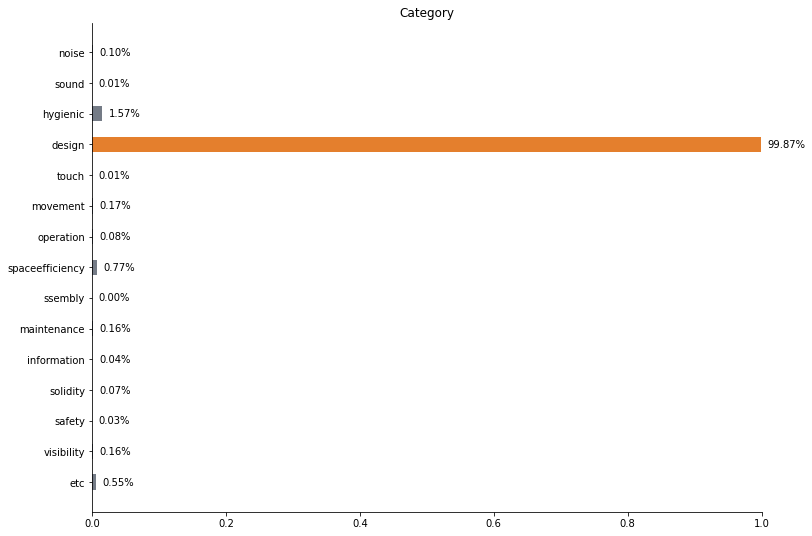

In [130]:
text = "디자인 맘에 들고"
predict_review(text)

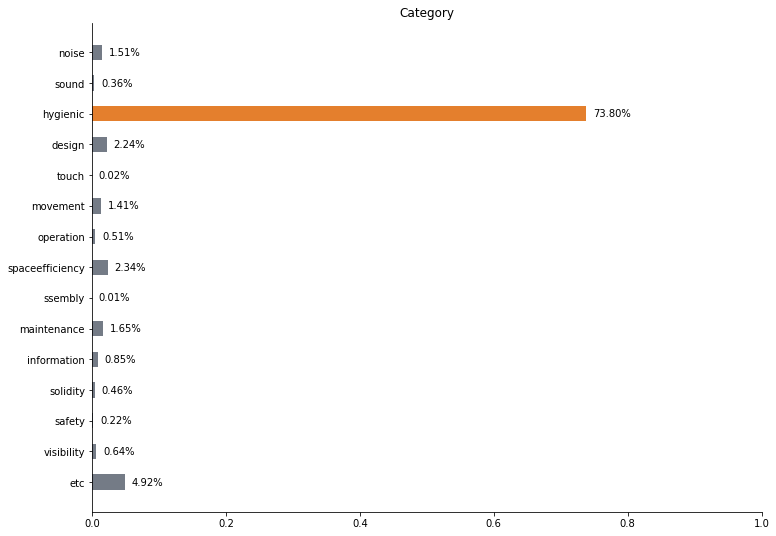

In [131]:
text = "접시에 음식물이 남아요"
predict_review(text)

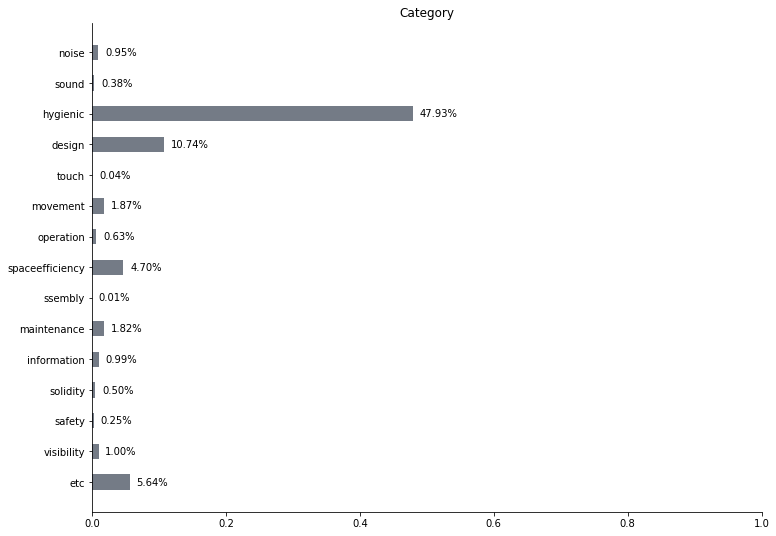

In [132]:
text = "많이 넣어도 자리가 남네요"
predict_review(text)

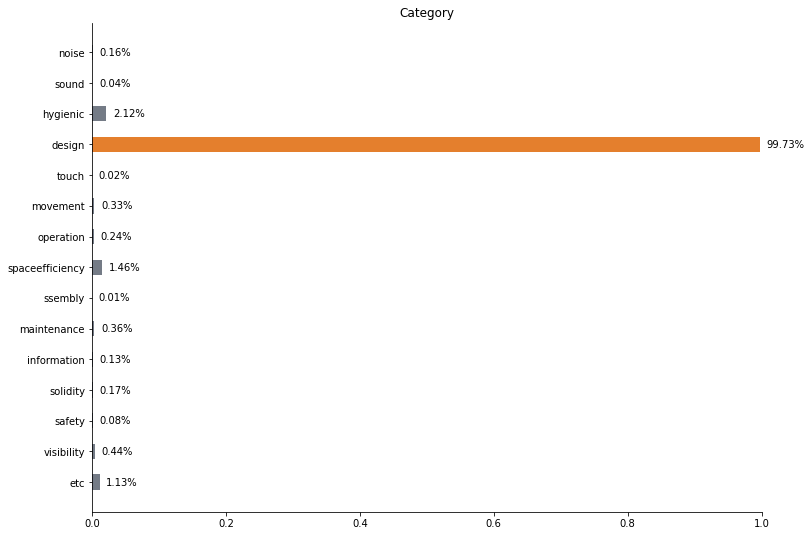

In [133]:
text = "디자인이 정갈하지 못해요"
predict_review(text)

결론: workstatus 보면 데이터 순서가 디자인 7946 > 공간효율성 2613 > 소음 2097 > 동작편리성 920 > 견고성 362 ... 순이다.
견고성까지는 대략적으로라도 나오는데 나머지 데이터가 많이 없는 카테고리들은 정확도 및 테스트에서도 아주 안좋은 결과를 가져온다. -> 데이터 증강 필요